## 1. Data Information

Loan Default Prediction Dataset This dataset contains information about customer loans, including customer demographics, loan details, and default status. The dataset can be used for various data analysis and machine learning tasks, such as predicting loan default risk. 

  ## 2. Goal

Building a machine learning model to predict DEFAULT and NO DEFAULT states based on Current_loan_status variable in the data set.

## 3. Features

* customer_id: Unique identifier for each customer 
* customer_age: Age of the customer
* customer_income: Annual income of the customer
* home_ownership: Home ownership status (e.g., RENT, OWN, MORTGAGE)
* employment_duration: Duration of employment in months
* loan_intent: Purpose of the loan (e.g., PERSONAL, EDUCATION, MEDICAL, VENTURE)
* loan_grade: Grade assigned to the loan
* loan_amnt: Loan amount requested
* loan_int_rate: Interest rate of the loan
* term_years: Loan term in years
* historical_default: Indicates if the customer has a history of default (Y/N)
* cred_hist_length: Length of the customer's credit history in years
* Current_loan_status: Current status of the loan (DEFAULT, NO DEFAULT)

## 4. Data Loading and Initial Overview

In [1]:
pip install xgboost

Note: you may need to restart the kernel to use updated packages.


In [2]:
# Import necessary libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV
from sklearn.model_selection import StratifiedKFold
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn.metrics import roc_auc_score, roc_curve, f1_score


In [3]:
# Load the dataset

df = pd.read_csv("LoanDataset.csv")

In [4]:
# Display the first 5 rows of the dataset

df.head()

,customer_id,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,1.0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,2.0,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,3.0,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,4.0,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,5.0,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


In [5]:
# Get a summary of the dataset

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 32586 entries, 0 to 32585
Data columns (total 13 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   customer_id          32583 non-null  float64
 1   customer_age         32586 non-null  int64  
 2   customer_income      32586 non-null  object 
 3   home_ownership       32586 non-null  object 
 4   employment_duration  31691 non-null  float64
 5   loan_intent          32586 non-null  object 
 6   loan_grade           32586 non-null  object 
 7   loan_amnt            32585 non-null  object 
 8   loan_int_rate        29470 non-null  float64
 9   term_years           32586 non-null  int64  
 10  historical_default   11849 non-null  object 
 11  cred_hist_length     32586 non-null  int64  
 12  Current_loan_status  32582 non-null  object 
dtypes: float64(3), int64(3), object(7)
memory usage: 3.2+ MB


## 5. Preparing Of The Data For Model

## 5.a. Dropping Customer Id Column

In [6]:
# Drop the 'customer_id' column from the DataFrame

df.drop(columns = "customer_id", inplace = True)

# Display the first 5 rows of the dataset
df.head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,C,"£35,000.00",16.02,10,Y,3,DEFAULT
1,21,9600,OWN,5.0,EDUCATION,A,"£1,000.00",11.14,1,NaN,2,NO DEFAULT
2,25,9600,MORTGAGE,1.0,MEDICAL,B,"£5,500.00",12.87,5,N,3,DEFAULT
3,23,65500,RENT,4.0,MEDICAL,B,"£35,000.00",15.23,10,N,2,DEFAULT
4,24,54400,RENT,8.0,MEDICAL,B,"£35,000.00",14.27,10,Y,4,DEFAULT


## 5.b. Converting Binary System Of The Depended Column

In [7]:
# Convert categorical variables to numerical values

def binary_convert(df, col_name):
    
    """
    ##################################################################
    
    Converts the values of 'DEFAULT' and '"DEFAULT NO' to 1 and 0 in the specified 
    column in the given DataFrame.
    
    Args:
    df (pd. DataFrame): The DataFrame to act on.
    column_name (str): The name of the column to be transformed.

    Returns:
    Pd. DataFrame: The DataFrame to which the values are converted.
    
    #####################################################################
    """
    
    df[col_name] = df[col_name].map({'DEFAULT': 1 ,'NO DEFAULT': 0})
    
    return df[col_name].head()

binary_convert(df, "Current_loan_status")


0    1.0
1    0.0
2    1.0
3    1.0
4    1.0
Name: Current_loan_status, dtype: float64

## 5.c. Converting Ordinal Type Of The Loan Grade Column

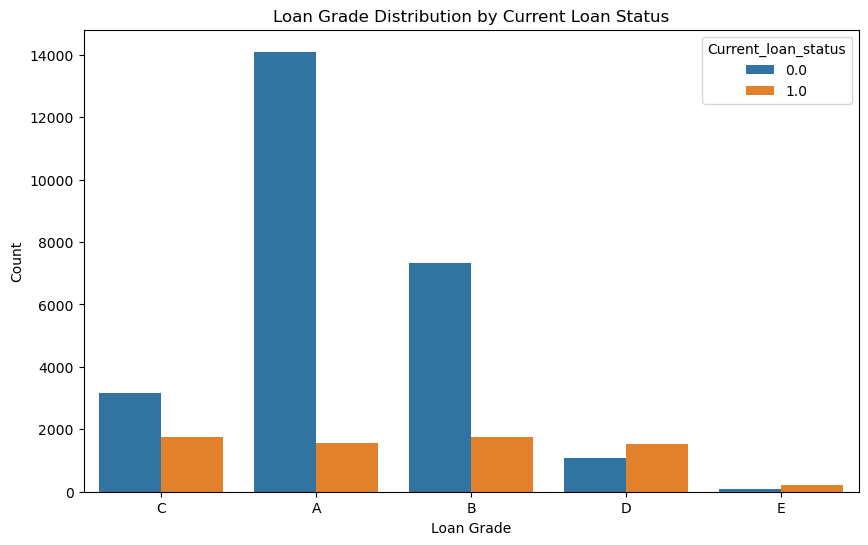

In [8]:
# Create a count plot
plt.figure(figsize=(10, 6))
sns.countplot(data=df, x = 'loan_grade', hue = 'Current_loan_status')
plt.title('Loan Grade Distribution by Current Loan Status')
plt.xlabel('Loan Grade')
plt.ylabel('Count')
plt.show()

In [9]:
df.loan_grade.value_counts()

loan_grade
A    15661
B     9065
C     4926
D     2629
E      305
Name: count, dtype: int64

In [10]:
df.groupby('loan_grade')['loan_int_rate'].mean()

loan_grade
A     8.557445
B    11.788434
C    14.235495
D    15.959060
E    18.964103
Name: loan_int_rate, dtype: float64

When we examine the table and the average interest rates, we observe that the system is structured as follows: "A": 5, "B": 4, "C": 3, "D": 2, "E": 1.

In [11]:
def ordinary_convert(df, col_name):
    
    """
    ##################################################################
    Converts the values of 'A,B,C,D,E' to 5,4,3,2,1 in the specified 
    column in the given DataFrame.
    
    Args:
    df (pd. DataFrame): The DataFrame to act on.
    column_name (str): The name of the column to be transformed.

    Returns:
    Pd. DataFrame: The DataFrame to which the values are converted.
    
    ##################################################################
    """
    
    df[col_name] = df[col_name].map({"A": 5, "B": 4, "C": 3, "D": 2, "E": 1})
    return df

ordinary_convert(df, "loan_grade").head()

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,3,"£35,000.00",16.02,10,Y,3,1.0
1,21,9600,OWN,5.0,EDUCATION,5,"£1,000.00",11.14,1,NaN,2,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,4,"£5,500.00",12.87,5,N,3,1.0
3,23,65500,RENT,4.0,MEDICAL,4,"£35,000.00",15.23,10,N,2,1.0
4,24,54400,RENT,8.0,MEDICAL,4,"£35,000.00",14.27,10,Y,4,1.0


## 5.d. Converting Integer Value Of The Customer Income Column

In [12]:
# Remove commas and whitespace from 'customer_income' column
df["customer_income"] = df["customer_income"].str.replace(',', '').str.strip()

# Convert 'customer_income' column to integers
df["customer_income"] = df["customer_income"].astype(int)

# Print the data type of 'customer_income' column
print("customer_income data type: ", df["customer_income"].dtype)

customer_income data type:  int32


## 5.e. Converting Integer Value Of The Loan Amount Column

In [13]:
# Remove commas and currency symbols from 'loan_amnt' column
df["loan_amnt"] = df["loan_amnt"].str.replace(',', '').str.strip("£")

# Convert 'loan_amnt' column to float
df["loan_amnt"] = df["loan_amnt"].astype("float64")

# Print the data type of 'customer_income' column
print("loan_amnt data type: ", df["loan_amnt"].dtype)

loan_amnt data type:  float64


## 6. Filling Missing Values In The Dataset

In [14]:
# Check the missing values in the dataset

df.isnull().sum()

customer_age               0
customer_income            0
home_ownership             0
employment_duration      895
loan_intent                0
loan_grade                 0
loan_amnt                  1
loan_int_rate           3116
term_years                 0
historical_default     20737
cred_hist_length           0
Current_loan_status        4
dtype: int64

## 6.a. Removing Missing Value Of The Loan Amount Column

Since the number of missing values is small, the deletion method was used instead of other methods.

In [15]:
# Remove missing values from the 'loan_amnt' column
# Count of missing value = 1

df.dropna(subset = ['loan_amnt'], inplace = True)

## 6.b. Filling NA Values Of The Historical Default Column

In [16]:
# Count occurrences of 'Y', 'N', and missing values

print(df["historical_default"].value_counts(dropna = False))

historical_default
NaN    20737
Y       6127
N       5721
Name: count, dtype: int64


print(df["Current_default_status"])

In [17]:
# Count of values of the Current loan status column

print(df["Current_loan_status"].value_counts(dropna = False))

Current_loan_status
0.0    25742
1.0     6839
NaN        4
Name: count, dtype: int64


The customer's past credit default status (YES/NO). When we look at the current situation, the data entries are recorded as "Y": 62128 and "N": 5721. Considering the values in the "Current loan status" column, it is observed that giving the value "N" to all the entries does not cause a proportional change. Therefore, the NaN values have been filled with "N"."

In [18]:
# Filling missing values with "N"
# Count of missing value = 20737

df["historical_default"] = df["historical_default"].fillna("N")

## 6.c. Filling Missing Values Of The Employement Duration Column

In [19]:
df["employment_duration"].value_counts().head(10).sum()

28064

In [20]:
# Frequencies of values in the employment_duration column
# Display most frequent 10 value

df["employment_duration"].value_counts().head(10)

employment_duration
0.0    4105
2.0    3849
3.0    3457
5.0    2946
1.0    2915
4.0    2873
6.0    2669
7.0    2196
8.0    1687
9.0    1367
Name: count, dtype: int64

The missing values in the employment_duration column have been filled by calculating the probabilities of the top 10 most frequent values.

In [21]:
def fill_missing_employment_duration(df):
    
    """
     
    ############################################################
    Fills missing values in 'employment_duration' column using 
    the most frequent values and their probabilities.

    Parameters:
    df DataFrame containing the 'employment_duration' column.

    Returns:
    df DataFrame with filled missing values in 'employment_duration'.
    ############################################################
    
    """
    
     # Calculate the 10 most frequent values in the 'employment_duration' column
    most_freq_value = df["employment_duration"].value_counts().head(10)
    
    # Calculate the sum of the frequencies of these 10 most frequent values
    most_freq_value_sum = most_freq_value.sum()
    
    # Calculate the probability of each of the 10 most frequent values
    most_freq_value_probability = most_freq_value.apply(lambda row: row / most_freq_value_sum)

    # Get the indices of the rows with missing values in 'employment_duration'
    missing_indices = df[df["employment_duration"].isnull()].index
    
    # Fill the missing values using a random choice based on the calculated probabilities
    df.loc[missing_indices, "employment_duration"] = np.random.choice(
                                                     most_freq_value.index,  
                                                     size = len(missing_indices),  
                                                     p = most_freq_value_probability)

    return df

# Applying the function to the DataFrame
df = fill_missing_employment_duration(df)

print("Sum values of employment duration column:", df["employment_duration"].isnull().sum())

Sum values of employment duration column: 0


In [22]:
# Frequencies of values in the employment_duration column
# count of missing value = 895

df["employment_duration"].value_counts().head(10)

employment_duration
0.0    4233
2.0    3966
3.0    3579
5.0    3031
1.0    3011
4.0    2977
6.0    2748
7.0    2270
8.0    1726
9.0    1418
Name: count, dtype: int64

## 6.d.Filling Missing Values Of The Loan In Rate Column

Instead of filling missing values in the loan_int_rate column using the overall average, the average interest rates based on each loan_grade were used to fill the missing values.

In [23]:
# Calculation of the average interest rates based on the average values for each loan grade

df.groupby('loan_grade')['loan_int_rate'].mean()

loan_grade
1    18.964103
2    15.959060
3    14.235495
4    11.788434
5     8.557445
Name: loan_int_rate, dtype: float64

In [24]:

def fill_missing_loan_int_rate(df):
    
    """

    ##################################################################
    
    Fills missing values in 'loan_int_rate' column with the mean value
    of 'loan_int_rate' for each 'loan_grade'.

    Parameters:
    df DataFrame , 'loan_int_rate' and 'loan_grade' columns.

    Returns:
    df DataFrame with filled missing values in 'loan_int_rate'.
    
    ###################################################################
    
    """
    
        
    # Calculate mean values by loan_grade
    mean_by_grade = df.groupby('loan_grade')['loan_int_rate'].mean()

    # Fill missing values in loan_int_rate
    df['loan_int_rate'] = df.apply(
        lambda row: mean_by_grade[row['loan_grade']] 
        if pd.isna(row['loan_int_rate']) else row['loan_int_rate'],
        axis=1
    )

    return df  
    
# Applying the function to the DataFrame
df = fill_missing_loan_int_rate(df)

## 6.e. Dropping Missing Values Of the Current Loan Status Column

Since the number of missing values is small, the deletion method was used instead of other methods.

In [25]:
# Dropping missing values
# Count of missing value = 4

df.dropna(subset=['Current_loan_status'], inplace=True)

In [26]:
# Checking Missing values of dataframe

df.isnull().sum()

customer_age           0
customer_income        0
home_ownership         0
employment_duration    0
loan_intent            0
loan_grade             0
loan_amnt              0
loan_int_rate          0
term_years             0
historical_default     0
cred_hist_length       0
Current_loan_status    0
dtype: int64

In [27]:
# Display the first 5 rows of the dataset

df.head(5)

,customer_age,customer_income,home_ownership,employment_duration,loan_intent,loan_grade,loan_amnt,loan_int_rate,term_years,historical_default,cred_hist_length,Current_loan_status
0,22,59000,RENT,123.0,PERSONAL,3,35000.0,16.02,10,Y,3,1.0
1,21,9600,OWN,5.0,EDUCATION,5,1000.0,11.14,1,N,2,0.0
2,25,9600,MORTGAGE,1.0,MEDICAL,4,5500.0,12.87,5,N,3,1.0
3,23,65500,RENT,4.0,MEDICAL,4,35000.0,15.23,10,N,2,1.0
4,24,54400,RENT,8.0,MEDICAL,4,35000.0,14.27,10,Y,4,1.0


## 7. Model Building


## 7.1. Preparing DataFrame Before Modelling

In [28]:
# Defining depended features and target values

X = df.drop("Current_loan_status", axis = 1)
y = df["Current_loan_status"].astype(int)

In [29]:
# Defining categorical columns
cat_cols = [col for col in X.columns if X[col].dtypes == "O"]

# Printing categorcal column names
print("categorical columns :", cat_cols)

categorical columns : ['home_ownership', 'loan_intent', 'historical_default']


In [30]:
# Convert categorical columns to numerical using one-hot encoding
dummies = pd.get_dummies(X[cat_cols], drop_first = True).astype(int)

# Display 5 rows
dummies.head(5)

,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
0,0,0,1,0,0,0,1,0,1
1,0,1,0,1,0,0,0,0,0
2,0,0,0,0,0,1,0,0,0
3,0,0,1,0,0,1,0,0,0
4,0,0,1,0,0,1,0,0,1


In [31]:
# Drop the categorical columns from the X

X.drop(cat_cols, axis = 1, inplace = True)

In [32]:
# Concatenate the DataFrame X with the dummies
X = pd.concat([X, dummies], axis = 1)

# Display 5 rows
X.head(5)

,customer_age,customer_income,employment_duration,loan_grade,loan_amnt,loan_int_rate,term_years,cred_hist_length,home_ownership_OTHER,home_ownership_OWN,home_ownership_RENT,loan_intent_EDUCATION,loan_intent_HOMEIMPROVEMENT,loan_intent_MEDICAL,loan_intent_PERSONAL,loan_intent_VENTURE,historical_default_Y
0,22,59000,123.0,3,35000.0,16.02,10,3,0,0,1,0,0,0,1,0,1
1,21,9600,5.0,5,1000.0,11.14,1,2,0,1,0,1,0,0,0,0,0
2,25,9600,1.0,4,5500.0,12.87,5,3,0,0,0,0,0,1,0,0,0
3,23,65500,4.0,4,35000.0,15.23,10,2,0,0,1,0,0,1,0,0,0
4,24,54400,8.0,4,35000.0,14.27,10,4,0,0,1,0,0,1,0,0,1


In [33]:
X.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32581 entries, 0 to 32585
Data columns (total 17 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------                       --------------  -----  
 0   customer_age                 32581 non-null  int64  
 1   customer_income              32581 non-null  int32  
 2   employment_duration          32581 non-null  float64
 3   loan_grade                   32581 non-null  int64  
 4   loan_amnt                    32581 non-null  float64
 5   loan_int_rate                32581 non-null  float64
 6   term_years                   32581 non-null  int64  
 7   cred_hist_length             32581 non-null  int64  
 8   home_ownership_OTHER         32581 non-null  int32  
 9   home_ownership_OWN           32581 non-null  int32  
 10  home_ownership_RENT          32581 non-null  int32  
 11  loan_intent_EDUCATION        32581 non-null  int32  
 12  loan_intent_HOMEIMPROVEMENT  32581 non-null  int32  
 13  loan_intent_MEDICAL  

In [34]:
y.value_counts(dropna = False)

Current_loan_status
0    25742
1     6839
Name: count, dtype: int64

In [35]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 42, shuffle = True, stratify = y)
#X_train, X_val, y_train, y_val = train_test_split(X_train, y_train, test_size = 0.2, random_state = 42)


In [36]:
X_train.shape

(26064, 17)

In [37]:
y_train.shape

(26064,)

In [38]:
X_test.shape

(6517, 17)

In [39]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train) 
X_test = scaler.transform(X_test)    

## 7.c. Generate Model

In [47]:
search_space = [
                # Logistic Regression
                {
                    "classifier": [LogisticRegression(solver = "liblinear")],
                    "classifier__C": [0.01, 0.1, 1.0, 10.0, 100],
                    "classifier__penalty": ["l1", "l2"]
                },
                
                # KNeighbors Classifier
                {
                    "classifier": [KNeighborsClassifier()],
                    "classifier__n_neighbors": [3, 4, 5, 6, 7, 8, 9, 10, 11, 12]
                },
                
                # Random Forest Classifier
                {
                    "classifier": [RandomForestClassifier(random_state = 42)],
                    "classifier__n_estimators": [100, 200, 300, 500, 1000],
                    "classifier__max_depth": [5, 10, 20, 50],
                    "classifier__min_samples_split": [2, 4, 6, 10],
                    "classifier__min_samples_leaf": [2, 4, 6, 10]
                },
                
                # Bagging Classifier
                {
                ##    "classifier": [BaggingClassifier(estimator = DecisionTreeClassifier())],
                  #  "classifier__n_estimators": [100, 200, 300, 500],
                 #   "classifier__max_samples": [0.5, 0.7, 1.0],
                  #  "classifier__max_features": [0.5, 0.7, 1.0],   
                   # "classifier__estimator__ccp_alpha": [np.linspace(0, 0.05, num =  100)],
                  #  "classifier__estimator__max_depth": [5, 10, 20, 50],
                   # "classifier__estimator__min_samples_split": [2, 4, 6, 10],
                   # "classifier__estimator__min_samples_leaf": [2, 4, 6, 10]
                },
    
                # GradientBoostingClassifier
                {
                   
                    "classifier": [GradientBoostingClassifier(random_state = 42)],
                    "classifier__n_estimators": [100, 200, 300, 500], 
                    "classifier__learning_rate": [0.001, 0.01, 0.1],  
                    "classifier__max_depth": [3, 5, 7, 10] 
                   
                },
    
                # XGBtClassifier
                {
                    
                    "classifier": [XGBClassifier(random_state = 42)],
                    "classifier__n_estimators": [100, 200, 300, 500],  
                    "classifier__learning_rate": [0.001, 0.01, 0.1, 0.2],  
                    "classifier__max_depth": [3, 5, 7, 10]  
                },
                
                ]
            
                            

In [48]:

pipe = Pipeline([('scaler', StandardScaler()), ('classifier', RandomForestClassifier(random_state = 42))])

In [49]:
clf = GridSearchCV(pipe, search_space, cv = StratifiedKFold(n_splits = 5, shuffle = True, random_state = 42),
                                            scoring = "accuracy", verbose = 2, n_jobs = -1)

best_model = clf.fit(X_train, y_train)

Fitting 5 folds for each of 453 candidates, totalling 2265 fits


In [50]:
best_model.best_estimator_.get_params()

{'memory': None,
 'steps': [('scaler', StandardScaler()),
  ('classifier',
   GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=42))],
 'verbose': False,
 'scaler': StandardScaler(),
 'classifier': GradientBoostingClassifier(max_depth=10, n_estimators=500, random_state=42),
 'scaler__copy': True,
 'scaler__with_mean': True,
 'scaler__with_std': True,
 'classifier__ccp_alpha': 0.0,
 'classifier__criterion': 'friedman_mse',
 'classifier__init': None,
 'classifier__learning_rate': 0.1,
 'classifier__loss': 'log_loss',
 'classifier__max_depth': 10,
 'classifier__max_features': None,
 'classifier__max_leaf_nodes': None,
 'classifier__min_impurity_decrease': 0.0,
 'classifier__min_samples_leaf': 1,
 'classifier__min_samples_split': 2,
 'classifier__min_weight_fraction_leaf': 0.0,
 'classifier__n_estimators': 500,
 'classifier__n_iter_no_change': None,
 'classifier__random_state': 42,
 'classifier__subsample': 1.0,
 'classifier__tol': 0.0001,
 'classifier__validation_fra

In [63]:
best_model.

False

In [66]:

def summarize_grid_search_results(grid_search):
    # Sonuçları bir DataFrame olarak alın
    results = pd.DataFrame(grid_search.cv_results_)
    
    # Sadece ilgili sütunları seçin
    columns_to_display = [
        'param_classifier',
        'mean_test_score']
    results = results[columns_to_display]
    
    # Sonuçları sırayla yazdırın
    for i, row in results.iterrows():
        print(f"Model: {row['param_classifier']}")
        print(f"Mean Test Score: {row['mean_test_score']:.4f}")
        print("\n")

# Örneğin, yukarıdaki best_model nesnesi ile kullanmak için:
summarize_grid_search_results(best_model)


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8380


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8400


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8427


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8425


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8433


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8432


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8433


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8433


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8433


Model: LogisticRegression(solver='liblinear')
Mean Test Score: 0.8433


Model: KNeighborsClassifier()
Mean Test Score: 0.8503


Model: KNeighborsClassifier()
Mean Test Score: 0.8589


Model: KNeighborsClassifier()
Mean Test Score: 0.8576


Model: KNeighborsClassifier()
Mean Test Score: 0.8594


Model: KNeighborsClassifier()
Mean Test Score: 0.8603




In [64]:
import pandas as pd

def summarize_best_grid_search_results_df(grid_search):
    # Sonuçları bir DataFrame olarak alın
    results = pd.DataFrame(grid_search.cv_results_)
    
    # İlgili sütunları seçin
    columns_to_display = [
        'param_classifier',
        'mean_test_score',
        'std_test_score',
        'rank_test_score',
        'params'
    ]
    results = results[columns_to_display]
    
    # Model adlarını string olarak dönüştürün
    results['param_classifier'] = results['param_classifier'].astype(str).apply(lambda x: x.split('(')[0])
    
    # Her model için en yüksek accuracy score'u seçin
    best_results = results.loc[results.groupby('param_classifier')['mean_test_score'].idxmax()]
    
    # Sadece model adları ve doğruluk skorlarını içeren bir DataFrame döndürün
    best_results = best_results[['param_classifier', 'mean_test_score']].reset_index(drop=True)
    best_results = best_results.sort_values(by='mean_test_score', ascending=False).reset_index(drop=True)
    
    return best_results

# Örneğin, yukarıdaki best_model nesnesi ile kullanmak için:
best_summary_df = summarize_best_grid_search_results_df(best_model)
print(best_summary_df)


             param_classifier  mean_test_score
0  GradientBoostingClassifier         0.930018
1               XGBClassifier         0.927371
2                         nan         0.919045
3      RandomForestClassifier         0.918393
4        KNeighborsClassifier         0.861917
5          LogisticRegression         0.843347


In [ ]:

knn = KNeighborsClassifier(n_neighbors = 10)

knn.fit(X_train, y_train)

knn.predict(X_test)

knn_score = knn.score(X_test, y_test)

In [ ]:
results = pd.DataFrame([], columns = ["SCORE"])

In [ ]:
results.loc["KNNeighbour"] = [knn_score]
results

In [ ]:
from sklearn.naive_bayes import GaussianNB
nb = GaussianNB()

nb.fit(X_train, y_train)
nb_pred = nb.predict(X_test)
nb_score = nb.score(X_test, y_test)

results.loc["GausNB"] = [nb_score]

results

In [ ]:
from sklearn.linear_model import LogisticRegression

log_model = LogisticRegression(C = 0.1, max_iter = 100, penalty = "l2")

log_model.fit(X_train, y_train)

log_predict = log_model.predict(X_test)

log_score = log_model.score(X_test, y_test)

results.loc["LogisticReg"] = [log_score]
results